# Homework 1

In [2]:
import cv2
import numpy as np

In [ ]:
img = cv2.imread('라쿤.jpg', cv2.IMREAD_GRAYSCALE)
kernel = np.array([[1, 1, 1],[1, -8, 1], [1, 1, 1]])
print(kernel)
output = cv2.filter2D(img, -1, kernel)
cv2.imshow('edge', output)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[ 1  1  1]
 [ 1 -8  1]
 [ 1  1  1]]


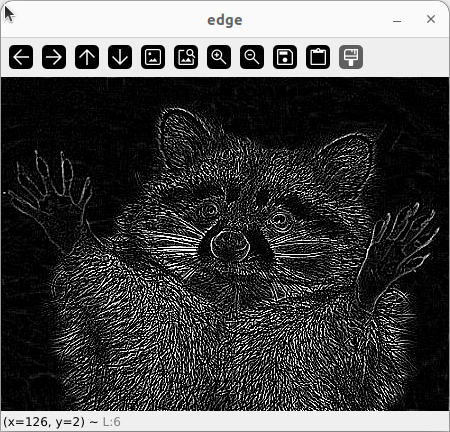

In [3]:
img = cv2.imread('라쿤.jpg', cv2.IMREAD_GRAYSCALE)
kernel = np.array([[0, -1, 0],[-1, 4, -1], [0, -1, 0]])
print(kernel)
output = cv2.filter2D(img, -1, kernel)
cv2.imshow('edge', output)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[ 0 -1  0]
 [-1  4 -1]
 [ 0 -1  0]]


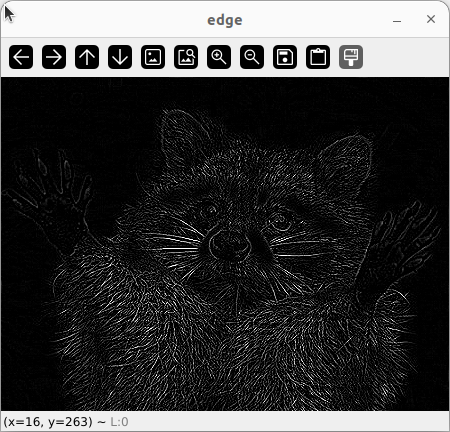

In [4]:
img = cv2.imread('라쿤.jpg', cv2.IMREAD_GRAYSCALE)
kernel = np.array([[0, -1, 0],[-1, 5, -1], [0, -1, 0]])
print(kernel)
output = cv2.filter2D(img, -1, kernel)
cv2.imshow('edge', output)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]


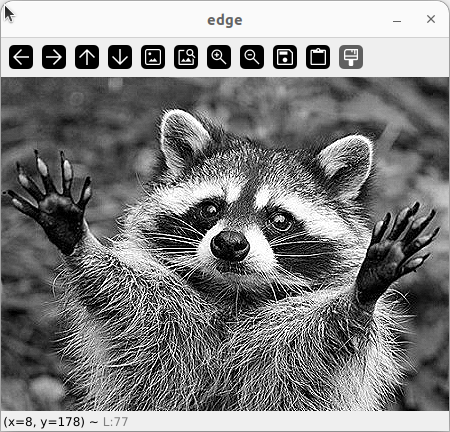

In [8]:
img = cv2.imread('라쿤.jpg', cv2.IMREAD_GRAYSCALE)
kernel = np.array([[1, 1, 1],[1, 1, 1], [1, 1, 1]])*(1/9)
print(kernel)
output = cv2.filter2D(img, -1, kernel)
cv2.imshow('edge', output)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


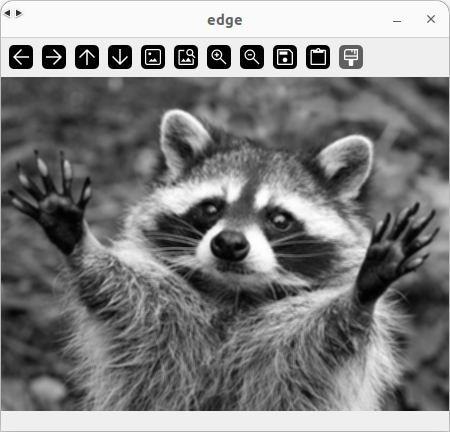

In [9]:
img = cv2.imread('라쿤.jpg', cv2.IMREAD_GRAYSCALE)
kernel = np.array([[1, 2, 1],[2, 4, 2], [1, 2, 1]])*(1/16)
print(kernel)
output = cv2.filter2D(img, -1, kernel)
cv2.imshow('edge', output)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


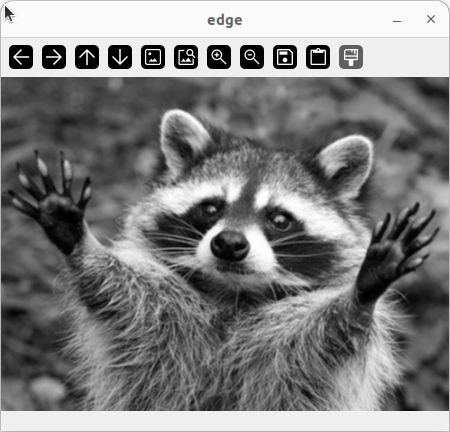

In [10]:
img = cv2.imread('라쿤.jpg', cv2.IMREAD_GRAYSCALE)
kernel = np.array([[1, 4, 6, 4, 1],[4, 16, 24, 16, 4], [6, 24, 36, 24, 6],
                  [4, 16, 24, 16, 4],[1, 4, 6, 4, 1]])*(1/256)
print(kernel)
output = cv2.filter2D(img, -1, kernel)
cv2.imshow('edge', output)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[0.00390625 0.015625   0.0234375  0.015625   0.00390625]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.0234375  0.09375    0.140625   0.09375    0.0234375 ]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.00390625 0.015625   0.0234375  0.015625   0.00390625]]


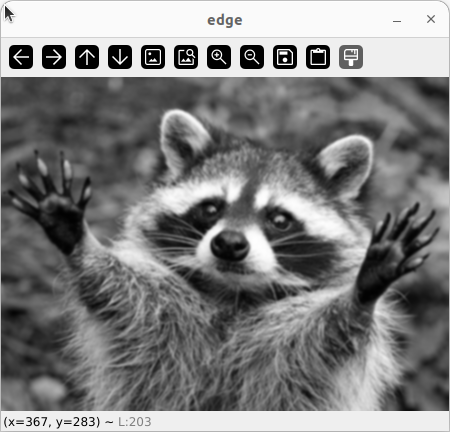

# Homework 2

In [24]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization,Flatten, Dense

In [25]:
mnist = tf.keras.datasets.mnist

(image_train, label_train), (image_test, label_test) = mnist.load_data()

image_train, image_test = image_train/255.0, image_test/255.0

In [38]:
# no batch
# CNN
model = Sequential()
model.add(Conv2D(32,(2,2),activation="sigmoid", input_shape=(28,28,1)))
model.add(Conv2D(64,(2,2),activation="sigmoid"))
model.add(Conv2D(128,(2,2),2,activation="sigmoid"))
model.add(Conv2D(32,(2,2),activation="sigmoid"))
model.add(Conv2D(64,(2,2),activation="sigmoid"))
model.add(Conv2D(128,(2,2),2,activation="sigmoid"))

model.add(Flatten())
model.add(Dense(128,activation="sigmoid"))
model.add(Dense(10,activation="softmax"))

In [74]:
# batch
model2 = Sequential()
model2.add(Conv2D(32,(2,2),activation="sigmoid",input_shape=(28,28,1)))
model2.add(BatchNormalization())
model2.add(Conv2D(64,(2,2),activation="sigmoid"))
model2.add(BatchNormalization())
model2.add(Conv2D(128,(2,2),2,activation="sigmoid"))
model2.add(BatchNormalization())
model2.add(Conv2D(32,(2,2),activation="sigmoid"))
model2.add(BatchNormalization())
model2.add(Conv2D(64,(2,2),activation="sigmoid"))
model2.add(BatchNormalization())
model2.add(Conv2D(128,(2,2),2,activation="sigmoid"))
model2.add(BatchNormalization())

model2.add(Flatten())
model2.add(Dense(128,activation="sigmoid"))
model2.add(Dense(10,activation="softmax"))

In [76]:
# relu
model3 = Sequential()
model3.add(Conv2D(32,(2,2),activation="relu",input_shape=(28,28,1)))
model3.add(Conv2D(64,(2,2),activation="relu"))
model3.add(Conv2D(128,(2,2),2,activation="relu"))
model3.add(Conv2D(32,(2,2),activation="relu"))
model3.add(Conv2D(64,(2,2),activation="relu"))
model3.add(Conv2D(128,(2,2),2,activation="relu"))

model3.add(Flatten())
model3.add(Dense(128,activation="sigmoid"))
model3.add(Dense(10,activation="softmax"))

In [42]:
# no batch train
model.compile(loss = "sparse_categorical_crossentropy",
                optimizer = "adam",
                metrics=["accuracy"])

history = model.fit(image_train, label_train, validation_data=(image_test, label_test), epochs=10, batch_size=10)

model.summary()

model.save('mnist_no_batch.h5')

Epoch 1/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 47s 8ms/step - accuracy: 0.1045 - loss: 2.3138 - val_accuracy: 0.1028 - val_loss: 2.3086
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 82s 8ms/step - accuracy: 0.1032 - loss: 2.3144 - val_accuracy: 0.1009 - val_loss: 2.3157
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 43s 7ms/step - accuracy: 0.1040 - loss: 2.3144 - val_accuracy: 0.1028 - val_loss: 2.3206
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 46s 8ms/step - accuracy: 0.1035 - loss: 2.3132 - val_accuracy: 0.1009 - val_loss: 2.3077
Epoch 5/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 43s 7ms/step - accuracy: 0.1016 - loss: 2.3145 - val_accuracy: 0.0980 - val_loss: 2.3281
Epoch 6/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 47s 8ms/step - accuracy: 0.1023 - loss: 2.3141 - val_accuracy: 0.1010 - val_loss: 2.3074
Epoch 7/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 45s 7ms/step - accuracy: 0.1035 - loss: 2.3144 - val_accuracy: 0.1010 - val_loss: 2.3168
Epoch 8/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 43s 7ms/step - accuracy: 0.1072 - loss: 2

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_76 (Conv2D)              │ (None, 27, 27, 32)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_77 (Conv2D)              │ (None, 26, 26, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_78 (Conv2D)              │ (None, 13, 13, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_79 (Conv2D)              │ (None, 12, 12, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_80 (Conv2D)              │ (None, 11, 11, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_81 (Conv2D)              │ (None, 5, 5, 128)      │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,529,696 (5.84 MB)

 Trainable params: 509,898 (1.95 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,019,798 (3.89 MB)

In [75]:
# batch train
model2.compile(loss = "sparse_categorical_crossentropy",
                optimizer = "adam",
                metrics=["accuracy"])

history2 = model2.fit(image_train, label_train, validation_data=(image_test, label_test), epochs=10, batch_size=100, shuffle=True)

model2.summary()

model2.save('mnist_batch.h5')

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 44s 70ms/step - accuracy: 0.9183 - loss: 0.2988 - val_accuracy: 0.7295 - val_loss: 0.8770
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 42s 70ms/step - accuracy: 0.9866 - loss: 0.0487 - val_accuracy: 0.9831 - val_loss: 0.0575
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 41s 68ms/step - accuracy: 0.9888 - loss: 0.0385 - val_accuracy: 0.9870 - val_loss: 0.0397
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 42s 70ms/step - accuracy: 0.9912 - loss: 0.0310 - val_accuracy: 0.9828 - val_loss: 0.0561
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 42s 71ms/step - accuracy: 0.9930 - loss: 0.0246 - val_accuracy: 0.9850 - val_loss: 0.0463
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 44s 74ms/step - accuracy: 0.9933 - loss: 0.0228 - val_accuracy: 0.9874 - val_loss: 0.0354
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 44s 74ms/step - accuracy: 0.9941 - loss: 0.0197 - val_accuracy: 0.9821 - val_loss: 0.0543
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 43s 71ms/step - accuracy: 0.9957 - loss: 0.0159 - 

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_106 (Conv2D)             │ (None, 27, 27, 32)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 27, 27, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_107 (Conv2D)             │ (None, 26, 26, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ (None, 26, 26, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_108 (Conv2D)             │ (None, 13, 13, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (None, 13, 13, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_109 (Conv2D)             │ (None, 12, 12, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 12, 12, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_110 (Conv2D)             │ (None, 11, 11, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_111 (Conv2D)             │ (None, 5, 5, 128)      │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 5, 5, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,533,280 (5.85 MB)

 Trainable params: 510,794 (1.95 MB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 1,021,590 (3.90 MB)

In [77]:
# relu train
model3.compile(loss = "sparse_categorical_crossentropy",
                optimizer = "adam",
                metrics=["accuracy"])

history3 = model3.fit(image_train, label_train, validation_data=(image_test, label_test), epochs=10, batch_size=100, shuffle=True)

model3.summary()

model3.save('mnist_relu.h5')

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.8488 - loss: 0.4899 - val_accuracy: 0.9828 - val_loss: 0.0657
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.9861 - loss: 0.0538 - val_accuracy: 0.9835 - val_loss: 0.0530
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.9904 - loss: 0.0358 - val_accuracy: 0.9881 - val_loss: 0.0362
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9934 - loss: 0.0244 - val_accuracy: 0.9895 - val_loss: 0.0329
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/step - accuracy: 0.9945 - loss: 0.0207 - val_accuracy: 0.9880 - val_loss: 0.0379
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - accuracy: 0.9964 - loss: 0.0131 - val_accuracy: 0.9887 - val_loss: 0.0336
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - accuracy: 0.9968 - loss: 0.0122 - val_accuracy: 0.9881 - val_loss: 0.0351
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.9980 - loss: 0.0091 - 

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_112 (Conv2D)             │ (None, 27, 27, 32)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_113 (Conv2D)             │ (None, 26, 26, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_114 (Conv2D)             │ (None, 13, 13, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_115 (Conv2D)             │ (None, 12, 12, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_116 (Conv2D)             │ (None, 11, 11, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_117 (Conv2D)             │ (None, 5, 5, 128)      │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,529,696 (5.84 MB)

 Trainable params: 509,898 (1.95 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,019,798 (3.89 MB)

# Homework 2

In [78]:
def plot_learning_curves(histories, model_names):
    """
    여러 모델의 학습 곡선을 그립니다.
    
    Args:
    - histories: 각 모델의 학습 history 객체들의 리스트
    - model_names: 각 모델의 이름 리스트
    """
    
    plt.figure(figsize=(14, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    for history, name in zip(histories, model_names):
        val_acc = history.history['val_accuracy']
        epochs = range(len(val_acc))
        plt.plot(epochs, val_acc, label=f'{name} val acc')
    plt.title('Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    # Loss plot
    plt.subplot(1, 2, 2)
    for history, name in zip(histories, model_names):
        val_loss = history.history['val_loss']
        epochs = range(len(val_loss))
        plt.plot(epochs, val_loss, label=f'{name} val loss')
    plt.title('Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

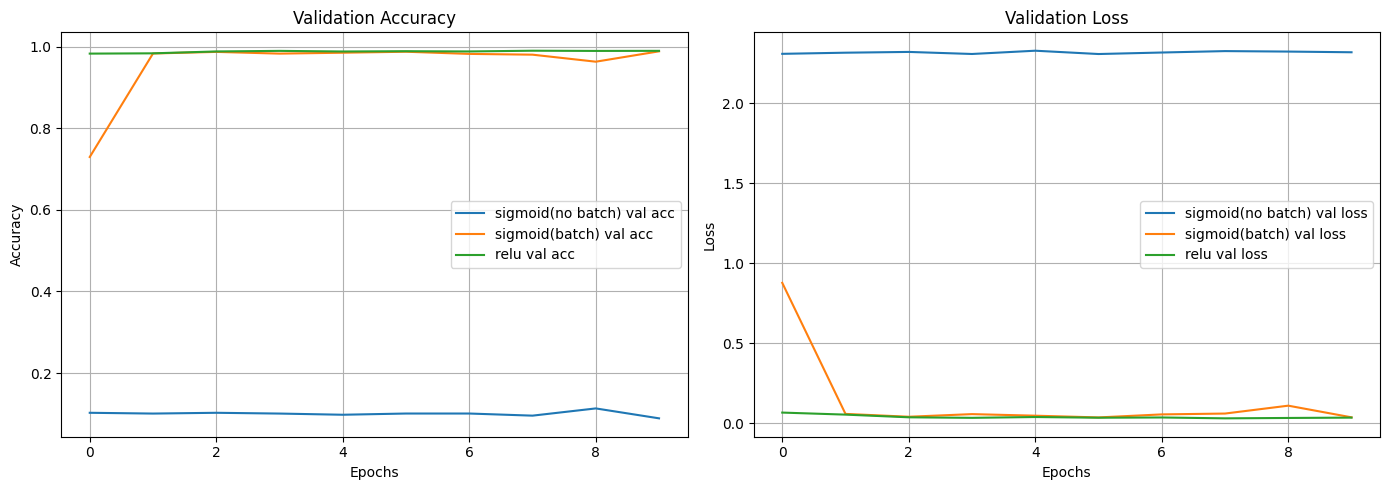

In [79]:
plot_learning_curves([history, history2, history3], ['sigmoid(no batch)', 'sigmoid(batch)', 'relu'])